# Explore

In [114]:
from wrangle import wrangle_zillow

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
train, validate, test = wrangle_zillow()

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [3]:
test.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1342909,4.0,3.0,1935.0,518087.0,1966.0,6473.00,6037.0
288418,3.0,2.0,1628.0,408717.0,1953.0,5174.04,6037.0
756966,4.0,2.0,2335.0,251726.0,1937.0,3410.80,6037.0
170536,2.0,2.0,1127.0,299500.0,1976.0,3558.68,6059.0
239987,4.0,2.0,1404.0,177025.0,1965.0,2248.13,6037.0


### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [24]:
train_sample = train.sample(10000)
train_sample.head()
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 432475 to 747092
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    10000 non-null  float64
 1   bathrooms   10000 non-null  float64
 2   area        10000 non-null  float64
 3   tax_value   10000 non-null  float64
 4   year_built  10000 non-null  object 
 5   taxamount   10000 non-null  float64
 6   fips        10000 non-null  object 
dtypes: float64(5), object(2)
memory usage: 625.0+ KB


In [22]:
train.isnull().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [30]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg')
    plt.show()

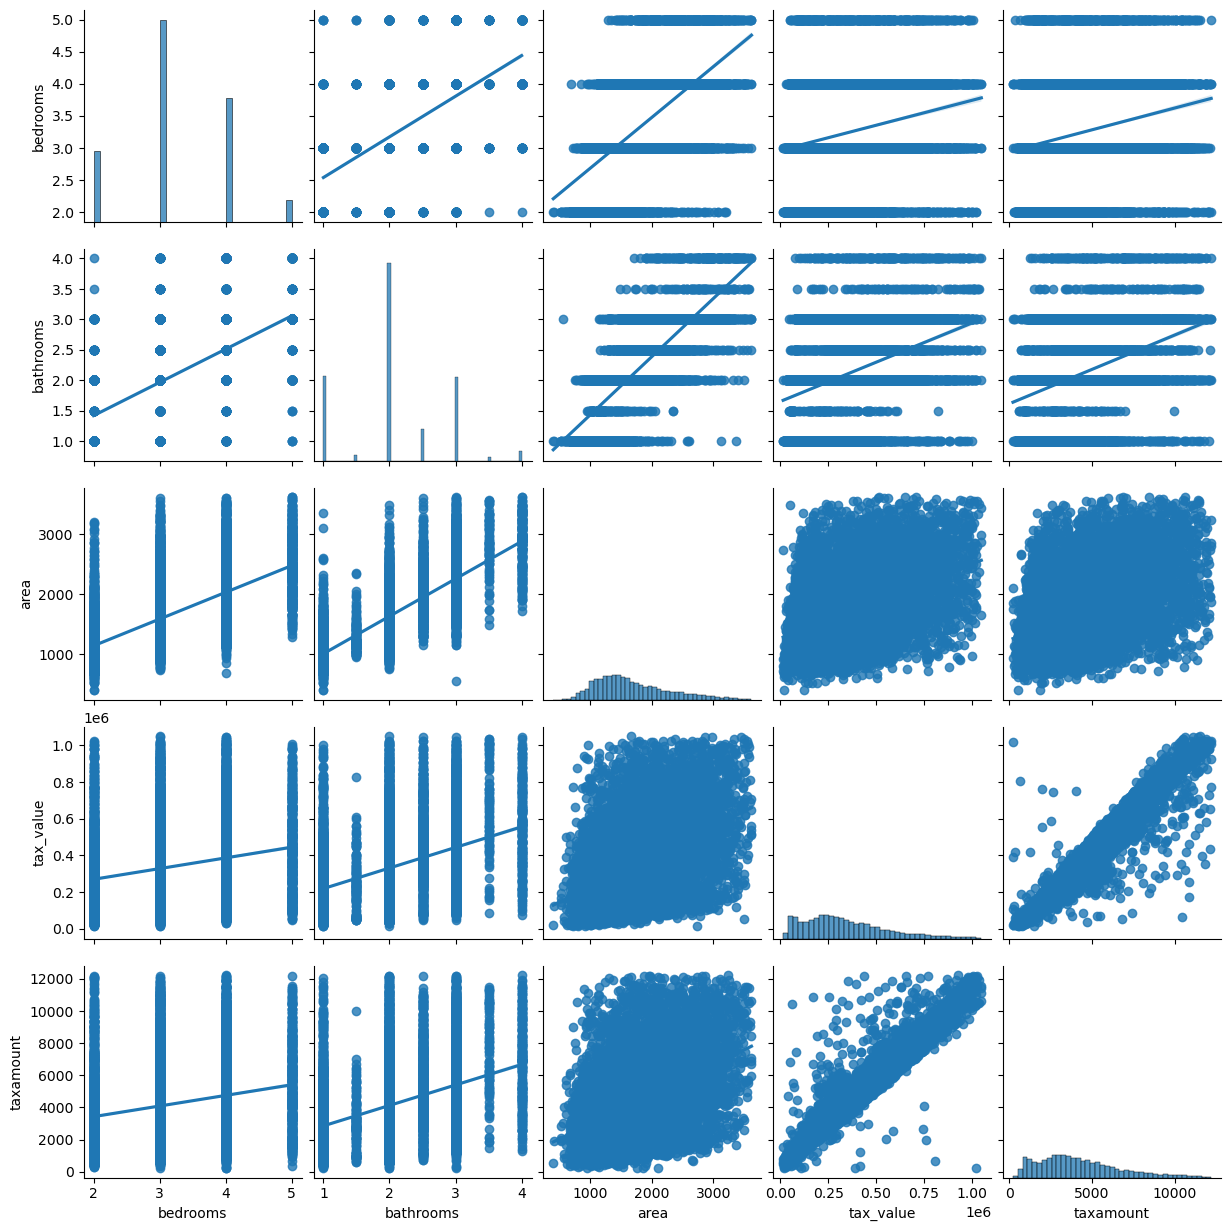

In [31]:
plot_variable_pairs(train_sample.drop(columns=['fips', 'year_built']))

### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

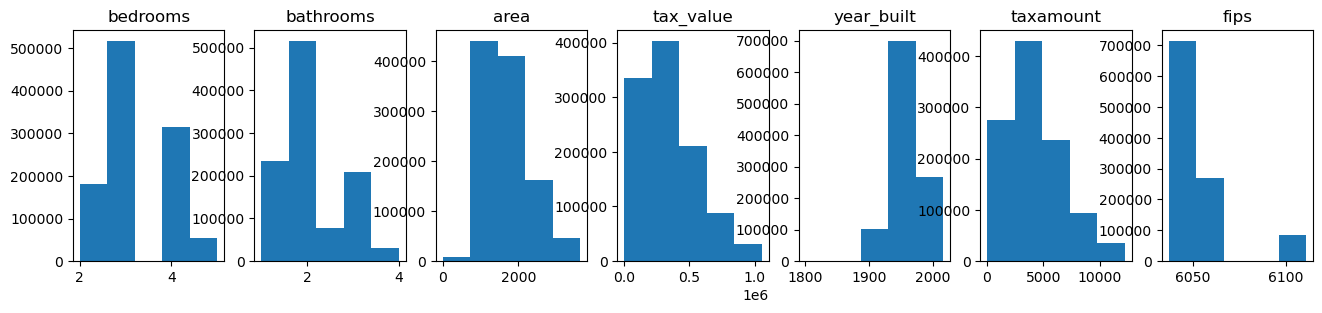

In [57]:
plt.figure(figsize=(16, 3))
cols = train.columns
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,len(cols),subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)
plt.show()

In [67]:
zillow_corr = train.corr(method='spearman')

In [68]:
zillow_corr

,bedrooms,bathrooms,area,tax_value,taxamount
bedrooms,1.000000,0.582418,0.610836,0.209231,0.209866
bathrooms,0.582418,1.000000,0.785545,0.373284,0.371225
area,0.610836,0.785545,1.000000,0.415227,0.410759
tax_value,0.209231,0.373284,0.415227,1.000000,0.973744
taxamount,0.209866,0.371225,0.410759,0.973744,1.000000


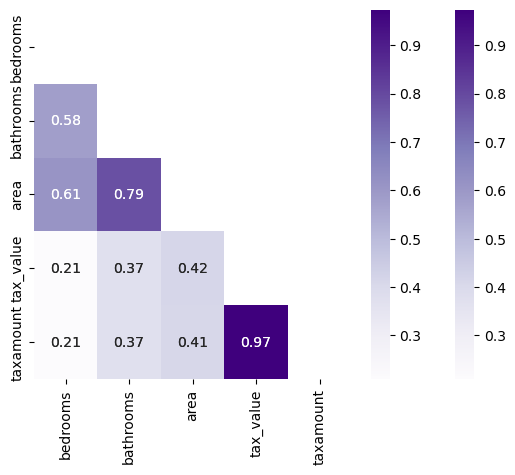

In [72]:
sns.heatmap(zillow_corr,
           cmap='Purples',
           annot=True,
           mask=np.triu(zillow_corr))
plt.show()

# NOT COOL WARM!

In [103]:
cat_cols = ['bedrooms', 'bathrooms', 'fips']
con_cols= ['year_built', 'area', 'tax_value', 'taxamount']
train_sample = train.sample(5000)

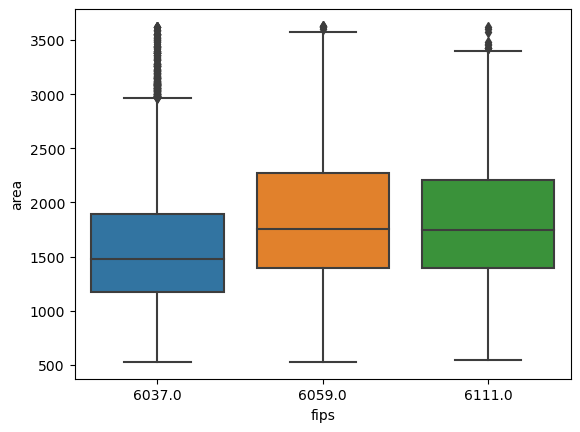

In [88]:
sns.boxplot(data=train_sample, x='fips', y='area')
plt.show()


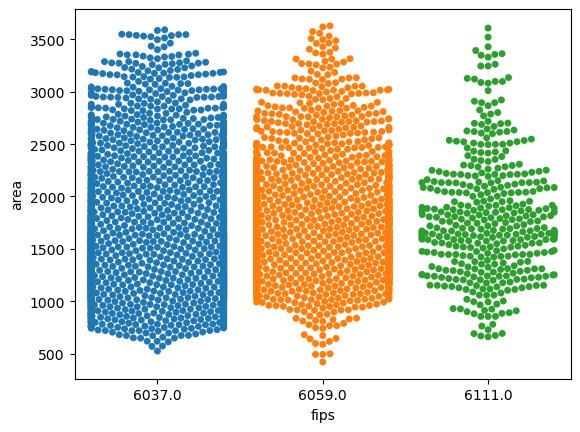

In [115]:
sns.swarmplot(data=train_sample, x='fips', y='area')
plt.show()

In [116]:
def plot_categorical_and_continuous_vars(df, cat_col, con_col):
    sns.boxplot(data=train_sample, x=cat_col, y=con_col)
    plt.show()
    sns.swarmplot(data=train_sample, x=cat_col, y=con_col)
    plt.show()
    sns.stripplot(data=train_sample, x=cat_col, y=con_col)
    plt.show()

    

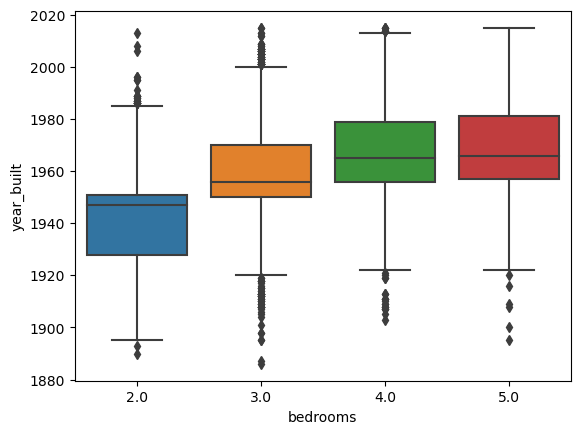

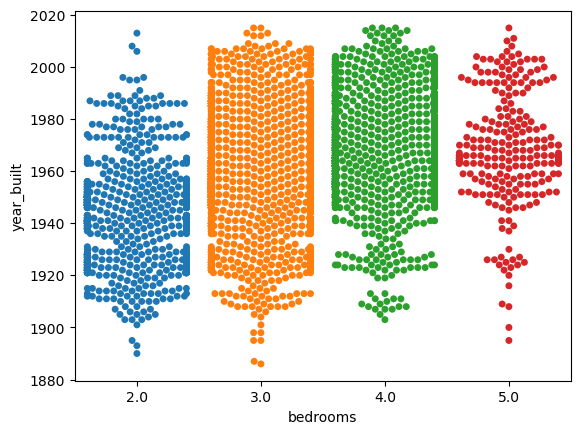

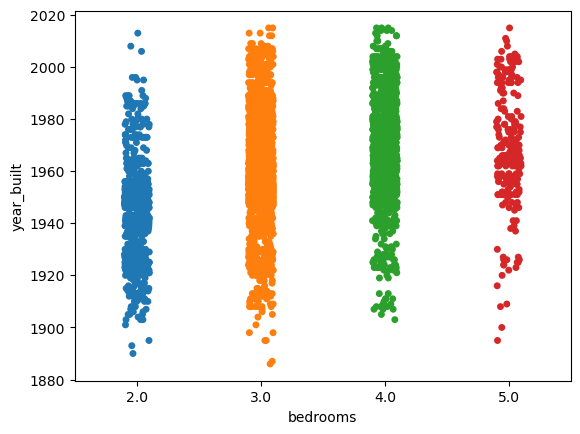

In [117]:
plot_categorical_and_continuous_vars(train_sample, 'bedrooms', 'year_built')